In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read IAM images, only images

# paths_images = !find ../data/htr_datasets/icfhr_2016/ -type f -name '*.png' 
# paths_images = !find ../data/htr_datasets/rodrigo/ -type f -name '*.png' 
# paths_images += !find ../data/htr_datasets/IAM/ -type f -name '*.png' 
# paths_images += !find ../data/htr_datasets/RIMES/ -type f -name '*.jpg' 
# paths_images += !find ../data/htr_datasets/bentham/ -type f -name '*.png' 

# Paths images all extensions (png, jpg) in ../data/htr_datasets/ 
paths_images = !find ../data/htr_datasets/ -type f -name '*.png' -o -name '*.jpg' -o -name '*.jpeg' -o -name '*.JPG' -o -name '*.JPEG'

# paths_images += !find ../data/htr_datasets/rodrigo/ -type f -name '*.png' 
# paths_images += !find ../data/htr_datasets/IAM/ -type f -name '*.png' 
# paths_images += !find ../data/htr_datasets/RIMES/ -type f -name '*.jpg' 
# paths_images += !find ../data/htr_datasets/bentham/ -type f -name '*.png' 

# Shuffle paths
np.random.seed(0)
np.random.shuffle(paths_images)
print(paths_images[:10])



['../data/htr_datasets/washington/washingtondb-v1.0/data/word_images_normalized/304-07-05.png', '../data/htr_datasets/washington/washingtondb-v1.0/data/line_images_normalized/303-18.png', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Images/train2011-800_000002.jpg', '../data/htr_datasets/icfhr_2016/lines/Seite0052_11.png', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Images/Lines/116_606_001_03_22.png', '../data/htr_datasets/IAM/IAM_lines/d04/d04-047/d04-047-01.png', '../data/htr_datasets/rodrigo/Rodrigo corpus 1.0.0/images/Rodrigo_00181_10.png', '../data/htr_datasets/IAM/IAM_lines/g06/g06-018b/g06-018b-01.png', '../data/htr_datasets/icfhr_2016/lines/Seite0295_6.png', '../data/htr_datasets/rodrigo/Rodrigo corpus 1.0.0/images/Rodrigo_00209_19.png']


In [9]:
lines_wikitext = []
with open("../data/synth/wikitext/wikitext-2-raw-v1.txt", "r") as f:
  lines_wikitext = f.readlines()

Font: ../data/synth/final_fonts_rendered/teeny tiny.ttf


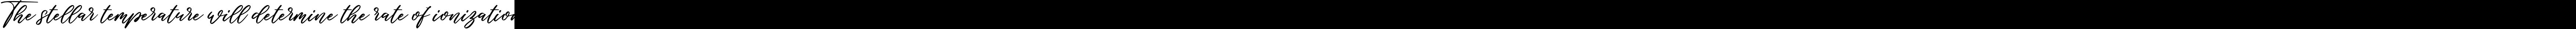

Font: ../data/synth/final_fonts_rendered/Hay Catty.ttf


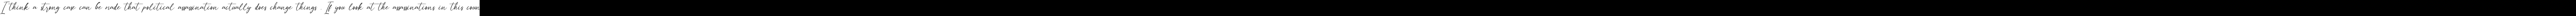

Font: ../data/synth/final_fonts_rendered/Romello.ttf


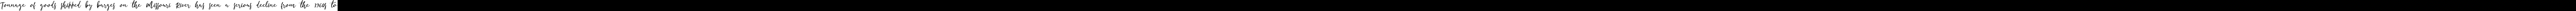

Font: ../data/synth/final_fonts_rendered/velocity_demo.ttf


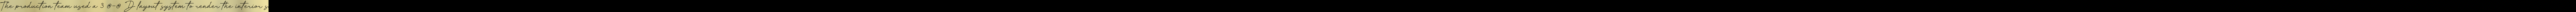

Font: ../data/synth/final_fonts_rendered/Castillion.ttf


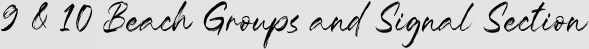

Font: ../data/synth/final_fonts_rendered/Always In My Heart.ttf


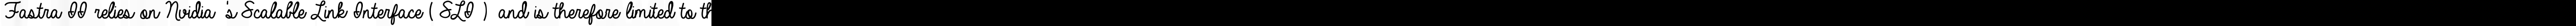

Font: ../data/synth/final_fonts_rendered/Anasteziya.ttf


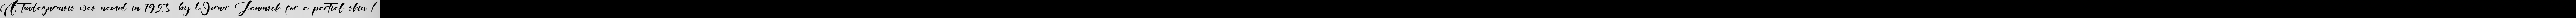

Font: ../data/synth/final_fonts_rendered/BLACK COBRA.ttf


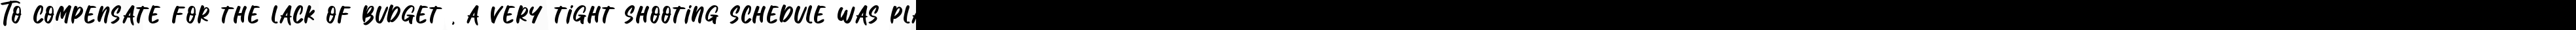

Font: ../data/synth/final_fonts_rendered/Zisilia.ttf


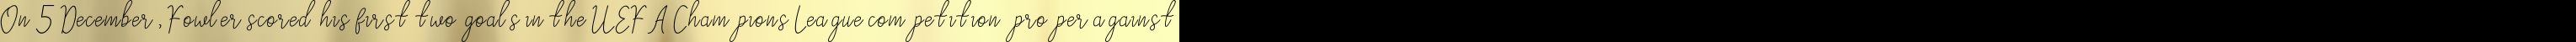

Font: ../data/synth/final_fonts_rendered/JarofHearts.ttf


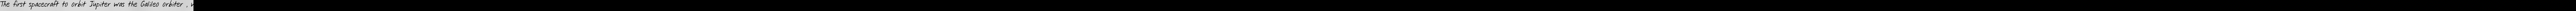

Font: ../data/synth/final_fonts_rendered/MahadettyFont.ttf


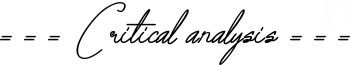

Font: ../data/synth/final_fonts_rendered/Great Answer.ttf


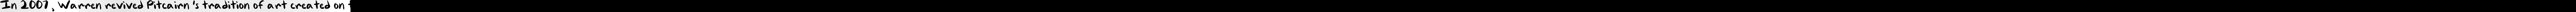

Font: ../data/synth/final_fonts_rendered/Kasuaari kirjastossa.ttf


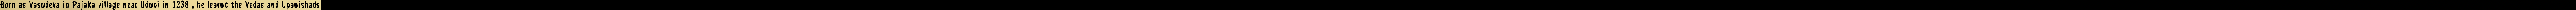

Font: ../data/synth/final_fonts_rendered/Welldone Special Italic TTF.ttf


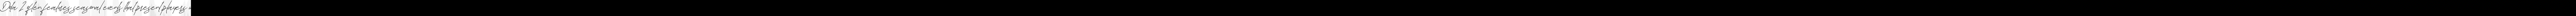

Font: ../data/synth/final_fonts_rendered/RIntjany.ttf


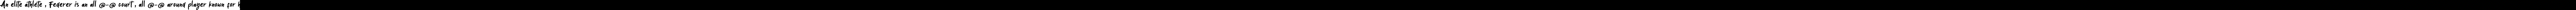

Font: ../data/synth/final_fonts_rendered/GelPenSerifHeavy.ttf


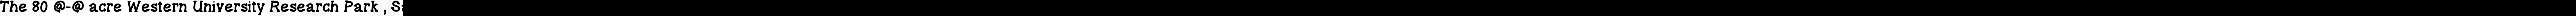

Font: ../data/synth/final_fonts_rendered/Money Honey.ttf


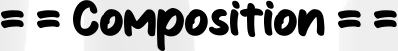

Font: ../data/synth/final_fonts_rendered/Yeager Gang.ttf


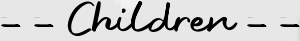

Font: ../data/synth/final_fonts_rendered/Buffalo City.ttf


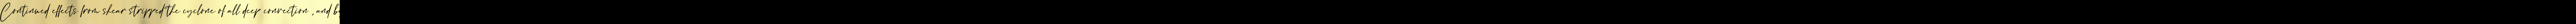

Font: ../data/synth/final_fonts_rendered/Koscar Liners Demo.ttf


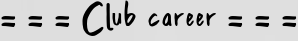

Font: ../data/synth/final_fonts_rendered/dontmix.ttf


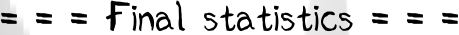

Font: ../data/synth/final_fonts_rendered/Graciast.ttf


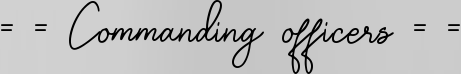

Font: ../data/synth/final_fonts_rendered/KMKDSPSH.ttf


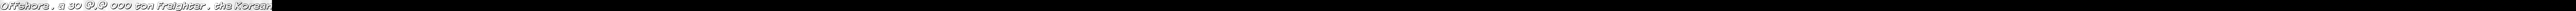

Font: ../data/synth/final_fonts_rendered/Wandhen.ttf


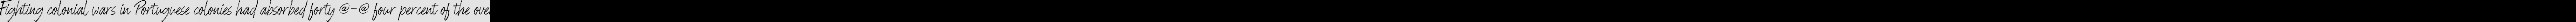

Font: ../data/synth/final_fonts_rendered/It started here, again.ttf


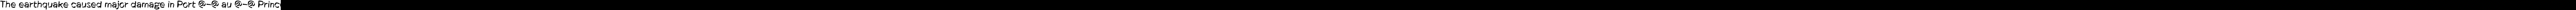

Font: ../data/synth/final_fonts_rendered/Queens Signature Demo.ttf


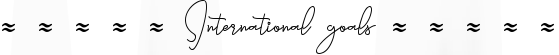

Font: ../data/synth/final_fonts_rendered/Gringer Bread.ttf


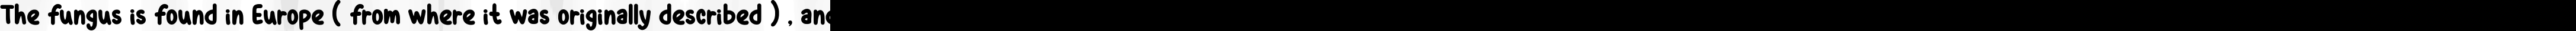

Font: ../data/synth/final_fonts_rendered/Pennature.ttf


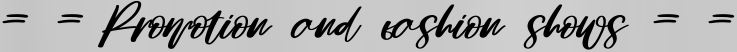

Font: ../data/synth/final_fonts_rendered/Rainsnight Regular.ttf


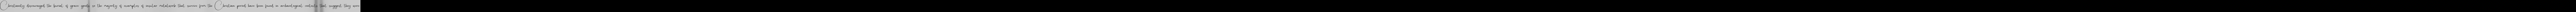

Font: ../data/synth/final_fonts_rendered/PlumScript.ttf


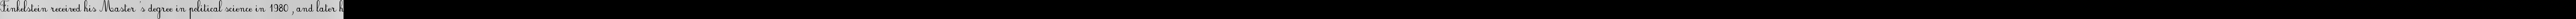

Font: ../data/synth/final_fonts_rendered/Ondemande.ttf


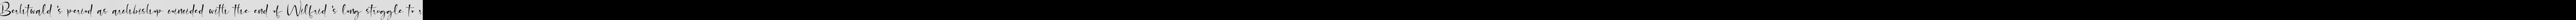

Font: ../data/synth/final_fonts_rendered/HEINZO.ttf


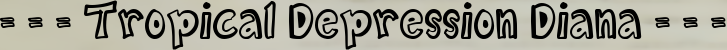

Font: ../data/synth/final_fonts_rendered/Misti's Destruction - TTF.ttf


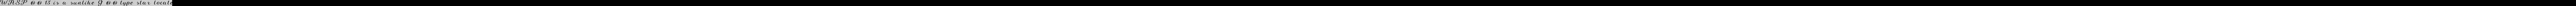

Font: ../data/synth/final_fonts_rendered/Rustic Bettina.ttf


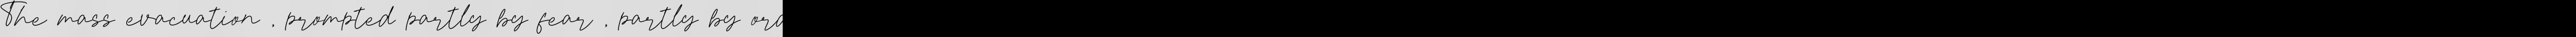

Font: ../data/synth/final_fonts_rendered/KMKDSPT_.ttf


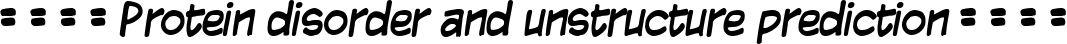

Font: ../data/synth/final_fonts_rendered/Holla.ttf


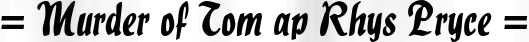

Font: ../data/synth/final_fonts_rendered/Aubrey Maldie Demo.ttf


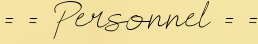

Font: ../data/synth/final_fonts_rendered/White Sunlight demo.ttf


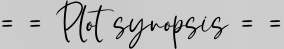

Font: ../data/synth/final_fonts_rendered/zai_NicolasSloppyPen.ttf


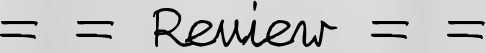

Font: ../data/synth/final_fonts_rendered/Historyline Demo.ttf


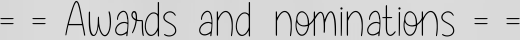

Font: ../data/synth/final_fonts_rendered/BadComic-Italic.ttf


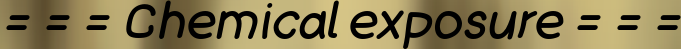

Font: ../data/synth/final_fonts_rendered/Riding Monday - TTF.ttf


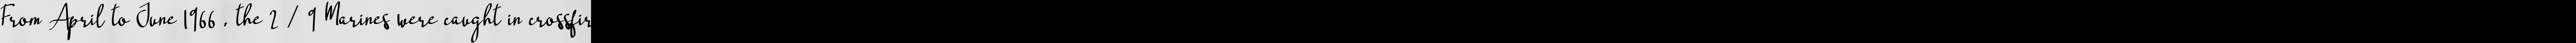

Font: ../data/synth/final_fonts_rendered/Feilla.ttf


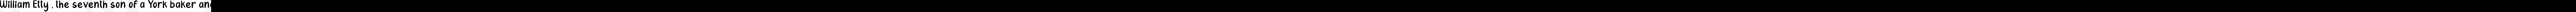

Font: ../data/synth/final_fonts_rendered/Loremipsum.ttf


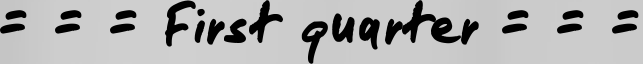

Font: ../data/synth/final_fonts_rendered/Nellisa - Personal Use.ttf


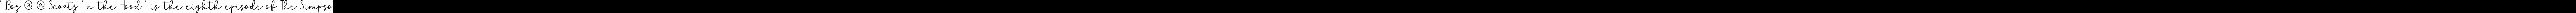

Font: ../data/synth/final_fonts_rendered/SinfoniettaPersonalUseOnly.ttf


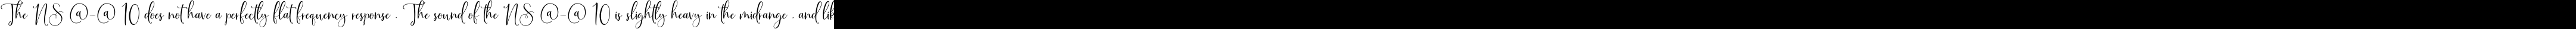

Font: ../data/synth/final_fonts_rendered/MyLuckyPenny.ttf


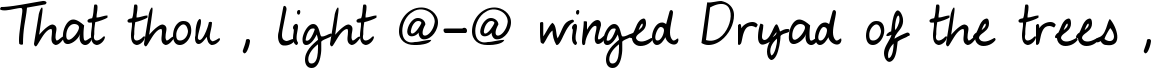

Font: ../data/synth/final_fonts_rendered/Bestfriend Signature.ttf


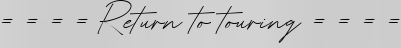

Font: ../data/synth/final_fonts_rendered/Special Beloved.ttf


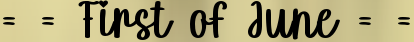

Font: ../data/synth/final_fonts_rendered/Simply Complicated - TTF.ttf


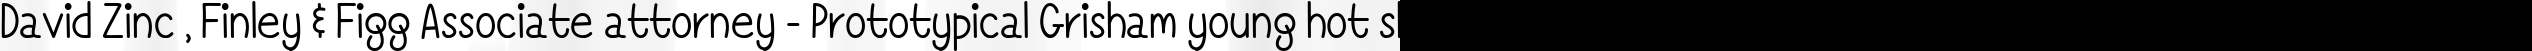

Font: ../data/synth/final_fonts_rendered/BeastieSignature.ttf


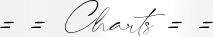

Font: ../data/synth/final_fonts_rendered/Wonderkids demo.ttf


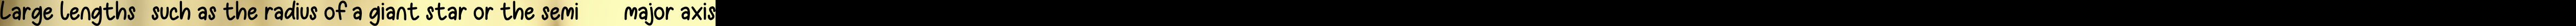

Font: ../data/synth/final_fonts_rendered/gapstown-r.ttf


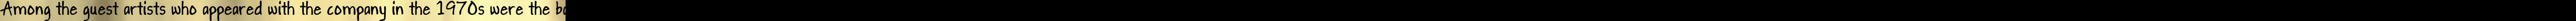

Font: ../data/synth/final_fonts_rendered/Black Magic.ttf


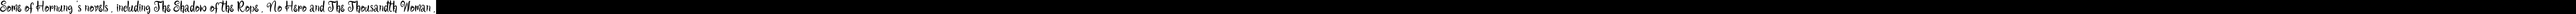

Font: ../data/synth/final_fonts_rendered/Guardian Circus.ttf


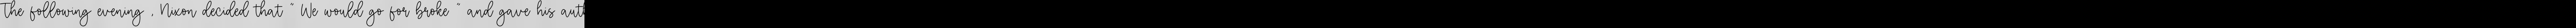

Font: ../data/synth/final_fonts_rendered/TaylillaDemo.ttf


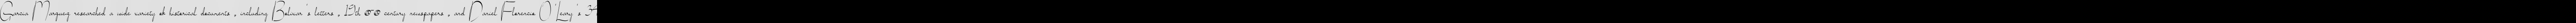

Font: ../data/synth/final_fonts_rendered/Long Path.ttf


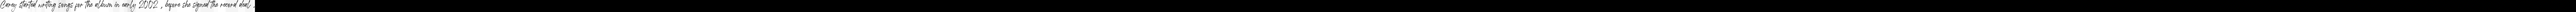

Font: ../data/synth/final_fonts_rendered/Dancing in the dark.ttf


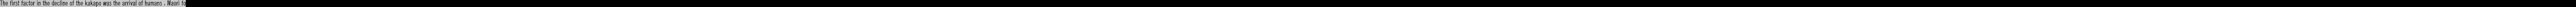

Font: ../data/synth/final_fonts_rendered/Handscript Signature Italic.ttf


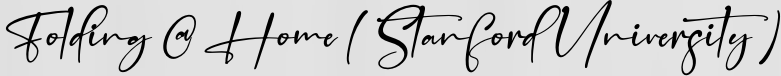

Font: ../data/synth/final_fonts_rendered/SweetNote.ttf


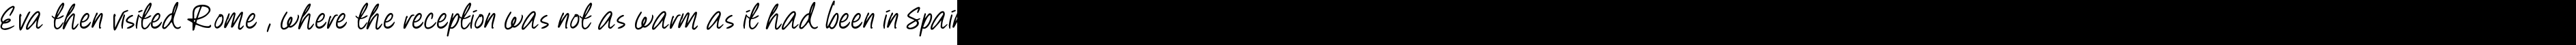

Font: ../data/synth/final_fonts_rendered/LearningToTrust.ttf


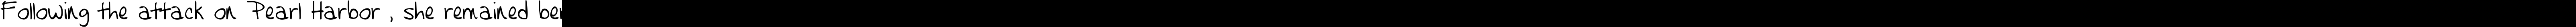

Font: ../data/synth/final_fonts_rendered/Easternation.ttf


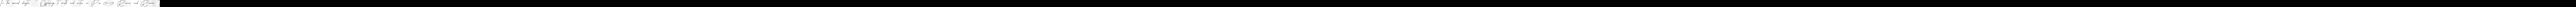

Font: ../data/synth/final_fonts_rendered/black mamba.ttf


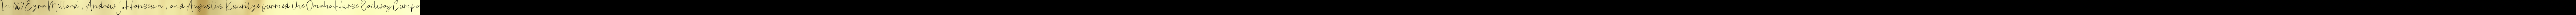

Font: ../data/synth/final_fonts_rendered/Rubeyma.ttf


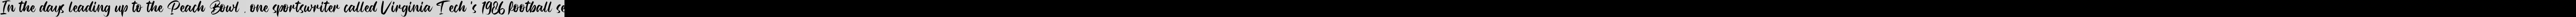

Font: ../data/synth/final_fonts_rendered/Einhorn Schrift - OTF.ttf


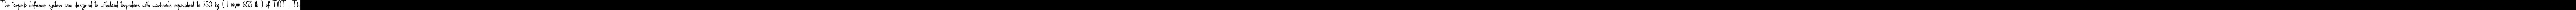

Font: ../data/synth/final_fonts_rendered/Never Ever - TTF.ttf


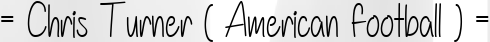

Font: ../data/synth/final_fonts_rendered/RainaHusnaItalic.ttf


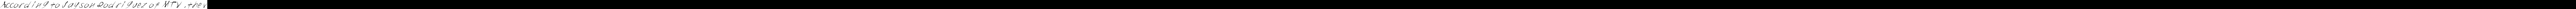

Font: ../data/synth/final_fonts_rendered/Donathe.ttf


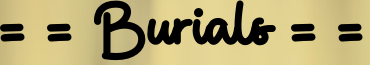

Font: ../data/synth/final_fonts_rendered/blzee.ttf


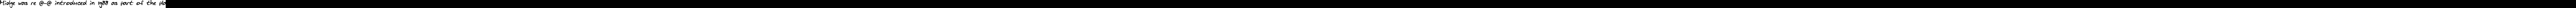

Font: ../data/synth/final_fonts_rendered/Keraton.ttf


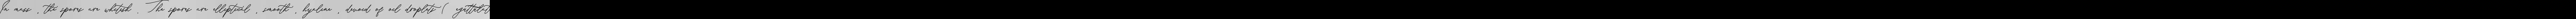

Font: ../data/synth/final_fonts_rendered/Bustercall - Signature Script.ttf


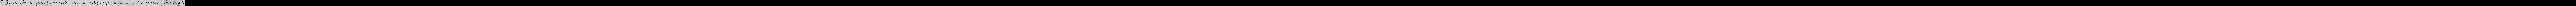

Font: ../data/synth/final_fonts_rendered/Hot August Night.ttf


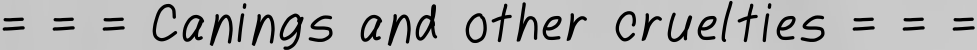

Font: ../data/synth/final_fonts_rendered/Glitter lovers.ttf


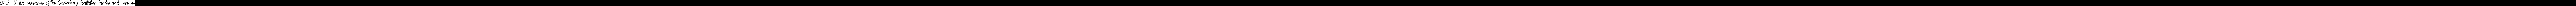

Font: ../data/synth/final_fonts_rendered/Emague Signature.ttf


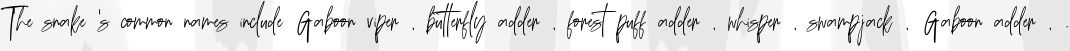

Font: ../data/synth/final_fonts_rendered/HarvestBailey-Script.ttf


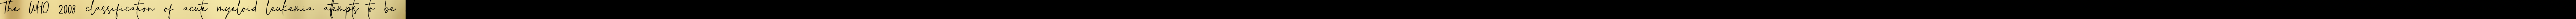

Font: ../data/synth/final_fonts_rendered/ArabillaSignature-Regular.ttf


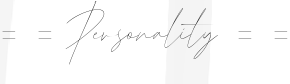

Font: ../data/synth/final_fonts_rendered/Everyday.ttf


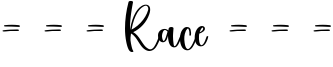

Font: ../data/synth/final_fonts_rendered/Karelly.ttf


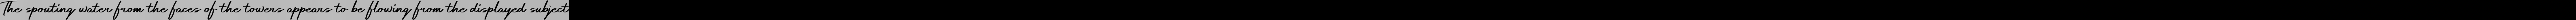

Font: ../data/synth/final_fonts_rendered/Driana Brideth Italic TTF.ttf


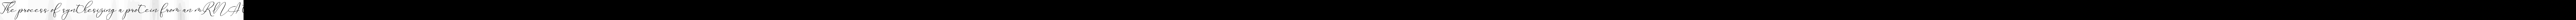

Font: ../data/synth/final_fonts_rendered/Lintang Kangen.ttf


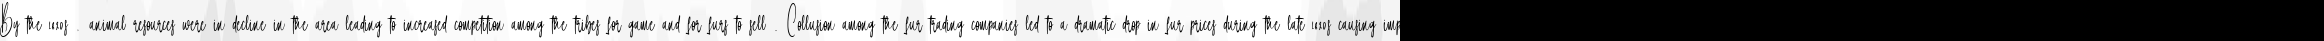

Font: ../data/synth/final_fonts_rendered/Close your eyes.ttf


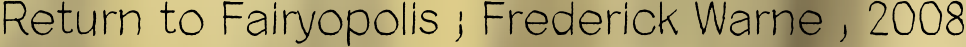

Font: ../data/synth/final_fonts_rendered/Flavellya.ttf


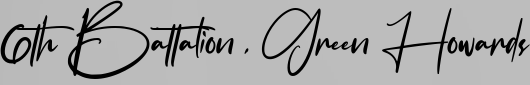

Font: ../data/synth/final_fonts_rendered/Jim Signature.ttf


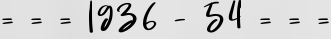

Font: ../data/synth/final_fonts_rendered/Magic Clause.ttf


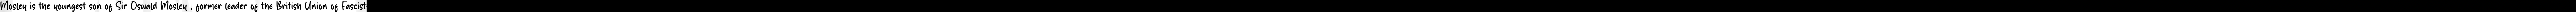

Font: ../data/synth/final_fonts_rendered/Barokah Signature by Alifinart Studio.ttf


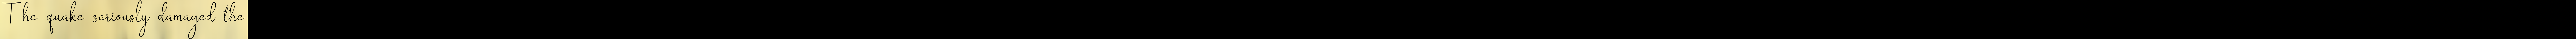

Font: ../data/synth/final_fonts_rendered/KGSmallTownSouthernGirl.ttf


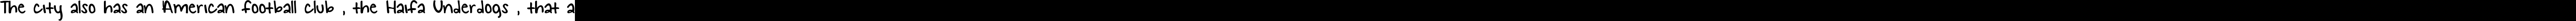

Font: ../data/synth/final_fonts_rendered/Flavellya.ttf


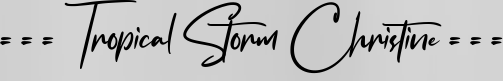

Font: ../data/synth/final_fonts_rendered/Maradona Signature ttf.ttf


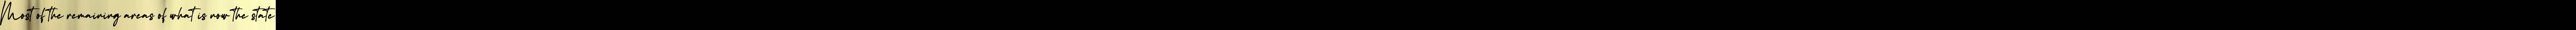

Font: ../data/synth/final_fonts_rendered/Life's A Beach Hollow.ttf


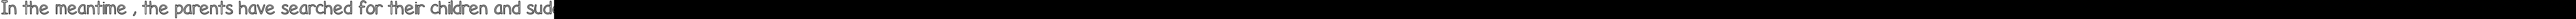

Font: ../data/synth/final_fonts_rendered/SacredianeFont.ttf


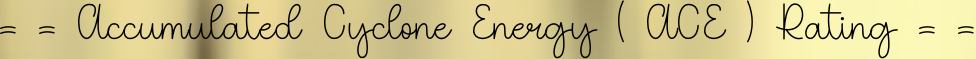

Font: ../data/synth/final_fonts_rendered/Zalerin.ttf


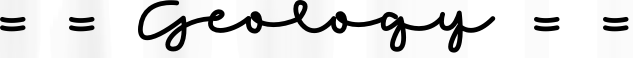

Font: ../data/synth/final_fonts_rendered/ToubibDemo-Bold.ttf


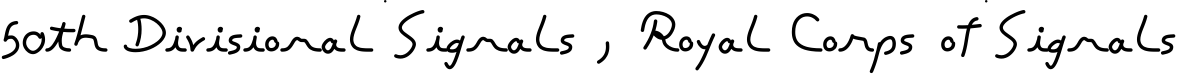

Font: ../data/synth/final_fonts_rendered/Rowdy.ttf


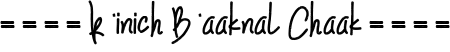

Font: ../data/synth/final_fonts_rendered/Andline.ttf


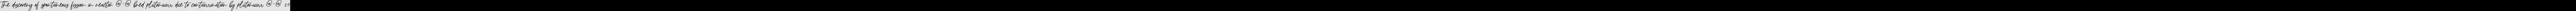

Font: ../data/synth/final_fonts_rendered/Gomena.ttf


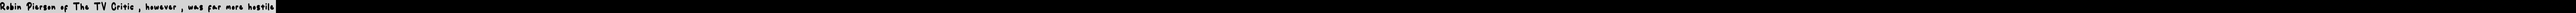

Font: ../data/synth/final_fonts_rendered/California Sunrise.ttf


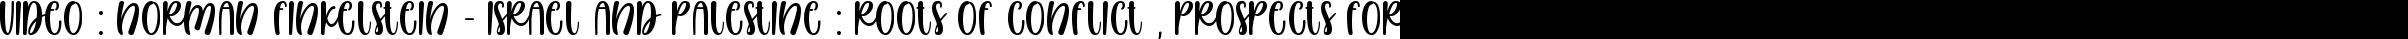

Font: ../data/synth/final_fonts_rendered/Strong Signature.ttf


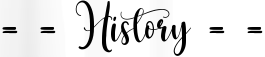

Font: ../data/synth/final_fonts_rendered/Madore.ttf


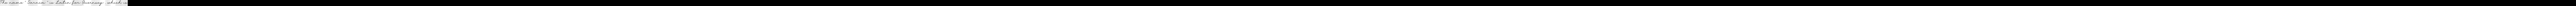

Font: ../data/synth/final_fonts_rendered/Chocolate Covered Raindrops Hollow.ttf


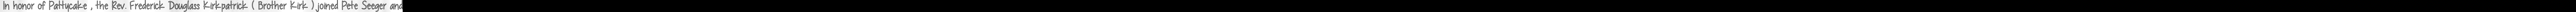

Font: ../data/synth/final_fonts_rendered/Ranjally.ttf


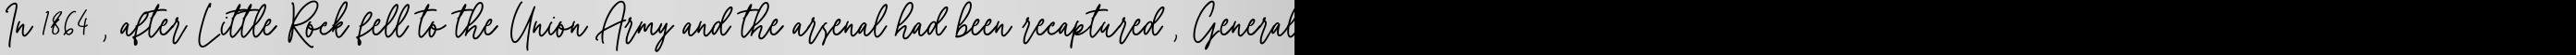

In [13]:
from torchvision.transforms import v2
from PIL import ImageFont, ImageDraw, Image

# Apply a big convolution to the image to remove letters
for idx in range(100):
  # Read image for extracting the background
  img = torchvision.io.read_image(paths_images[idx])
  img_size = img.size()[1:]
  img_size = (1500, 1000)
  img_pil_orig = torchvision.transforms.ToPILImage()(img)
  img_pil_orig_resized = img_pil_orig.resize((1500, 1000))

  # Read image
  image = cv2.imread(paths_images[idx])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB
  # Apply median filter to remove text
  identity = cv2.medianBlur(image, 51)

  # Convert to PIL
  img_pil_background = PIL.Image.fromarray(identity)
  img_pil_background_resized = img_pil_background.resize((1500, 1000))
  
  # Add text to image
  paths_fonts = !find ../data/synth/final_fonts_rendered -type f -name '*.ttf'
  font = np.random.choice(paths_fonts)
  print(f'Font: {font}')
  font = ImageFont.truetype(font, 50)
  # txt = 'As he pointed out, "the world is round".'
  txt = np.random.choice(lines_wikitext)
  
  text_color = (0, 0, 0)

  draw = ImageDraw.Draw(img_pil_background_resized)
  draw.text((img_size[1]//10, img_size[0]//4), txt, font=font, fill=text_color)
  text_bbox = draw.textbbox((img_size[1]//10, img_size[0]//4), txt, font=font)
  # img_pil_background_resized.show()

  cropped_image = img_pil_background_resized.crop(text_bbox)
  # Add padding to image with PIL

  # # img = cropped_image.resize((256, 64))
  img_pil = cropped_image
  # img_pil.show()

  # elastic_transformer = v2.ElasticTransform(sigma=5.0,alpha=5.0, fill=255)#,fill=255)
  # img_pil = elastic_transformer(img_pil)
  # # img_pil.show()

  # # Change ink color and apply degradations to text
  # brown_color = InkColor(color=(139, 69, 19))
  # ink_color = InkColor(color=(0, 0, 255))
  # ink_color = InkColor(color=brown_color.color)


  # img_pil = ink_color(img_pil)
  # img_pil = np.array(img_pil)

  # Apply median filter to blur (a little bit) the text
  # img_pil = cv2.medianBlur(img_pil, 3)
  # Back to PIL
  # img_pil = PIL.Image.fromarray(img_pil)
  # Resize image
  # img_pil = img_pil.resize((1256, 264))
  img_pil.show()


In [7]:
class InkColor(object):
  def __init__(self, color=(0, 0, 0)):
    self.color = color

  def __call__(self, image):
    # Binarize with opencv to obtain a mask of the pixels
    image_thres = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(image_thres, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Change ink with the mask and resize
    ink_image = Image.new('RGB', image.size, color=self.color)
    ink_image = ink_image.resize(image.size)
    ink_image = torchvision.transforms.ToTensor()(ink_image)
    
    # Apply degradations only to a mask
    ink_mask = torch.rand((3, image.size[1], image.size[0]))
    ink_image = ink_image * ink_mask

    # Apply gaussian noise through torchvision
    ink_image = torchvision.transforms.GaussianBlur(kernel_size=9)(ink_image)
    ink_image = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5)(ink_image)
    ink_image = torchvision.transforms.ToPILImage()(ink_image)
    # ink_image.show()

    noise = PerlinNoise(octaves=8, seed=1)
    xpix, ypix = 100, 100
    pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

    image_noised = Image.fromarray(np.array(pic) * 255, 'L')
    
    # concat images to match the size of ink_image without resizing with function paste
    canvas_noise = Image.new('RGB', ink_image.size, (255, 255, 255))
    for x in range(0, ink_image.size[0], xpix):
        canvas_noise.paste(image_noised, (x, 0))
    
    canvas_noise = torchvision.transforms.ToTensor()(canvas_noise)

    # Apply the noise to ink_image
    ink_image = torchvision.transforms.ToTensor()(ink_image)
    alpha = 0.9
    ink_image = alpha * ink_image + (1 - alpha) * (canvas_noise / 255)
    ink_image = torchvision.transforms.ToPILImage()(ink_image)

    image = Image.composite(image, ink_image, Image.fromarray(mask))
    
    return image

# ink_color = InkColor(color=(139, 69, 19))
# for _ in range(10):
#   img_pil_2 = ink_color(img_pil.copy())
#   # Resize to (1500, 1000)
#   img_pil_2 = img_pil_2.resize((1200, 200))
#   img_pil_2.show()



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


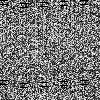

NameError: name 'img_pil_2' is not defined

In [4]:
from PIL import Image
import numpy as np
!pip install perlin_noise
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=10, seed=1)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

image_noised = Image.fromarray(np.array(pic) * 255, 'L')
image_noised.show()
# Resize to img_pil_2 size
shape_img_pil_2 = img_pil_2.size
image_noised = image_noised.resize(shape_img_pil_2)
image_noised.show()

# Apply the noise to ink_image
ink_image = torchvision.transforms.ToTensor()(ink_image)
ink_image = ink_image + torch.tensor(np.array(pic) * 255 / 255)
ink_image = torchvision.transforms.ToPILImage()(ink_image)
ink_image.show()

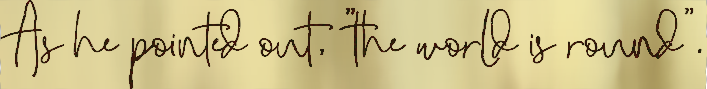

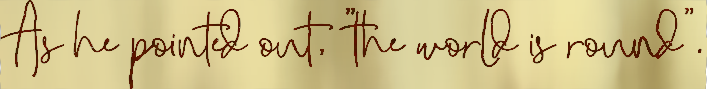

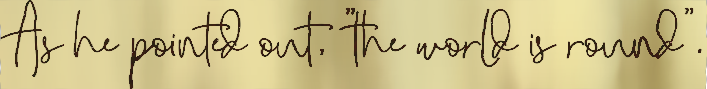

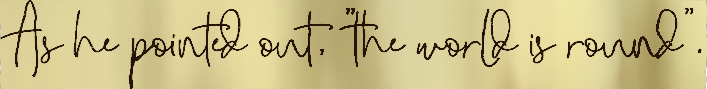

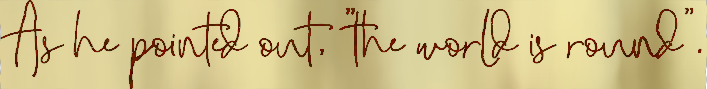

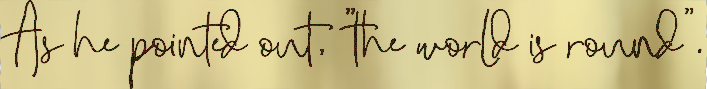

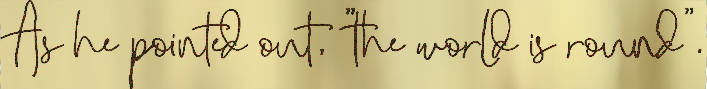

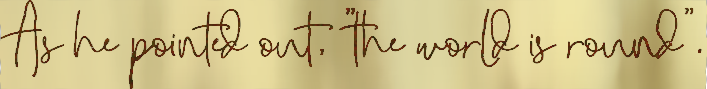

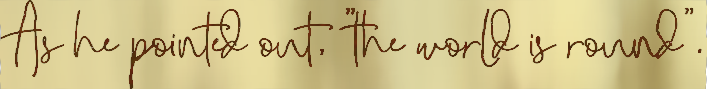

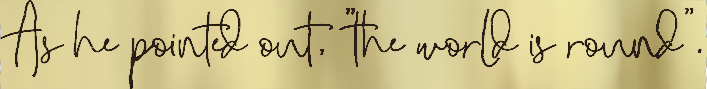

In [ ]:
# Get the difference between the two images
from PIL import ImageChops

ink_color = InkColor(color=(139, 69, 19))
for _ in range(10):
  img_pil_2 = ink_color(img_pil.copy())
  # Resize to (1500, 1000)
  # img_pil_2 = img_pil_2.resize((1500, 400))
  img_pil_2.show()

  # Show the difference between the two images
  diff = ImageChops.difference(img_pil, img_pil_2)
  diff.show()


# diff = ImageChops.difference(image, image_noised)
# diff.show()

In [ ]:
noise = PerlinNoise(octaves=10, seed=1)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]


# Print each value of the noise
for i in range(100):
  for j in range(100):
    print(pic[i][j])

0.0
0.06797096790508182
0.12538492339467963
0.160817792859695
0.16694652170223076
0.14383067542836836
0.09970864666954354
0.049308468132520246
0.00967323147796174
-0.006498887872400486
0.0
0.008928218122785095
0.004938067390395071
-0.01331124278686805
-0.0396489430338669
-0.0649972690685357
-0.08085287395028308
-0.08164508751888971
-0.06597102302390265
-0.036707530944524704
0.0
0.04360066221772873
0.10743002233272685
0.18378583175874919
0.2512699760815821
0.2886840315686658
0.28393636161320895
0.23796075311279863
0.16364659278250285
0.07978058340246648
0.0
-0.072707575856794
-0.12110572081517698
-0.1331546459757544
-0.10907222490773605
-0.059160162615119694
-0.0006078768928904354
0.04672590792677317
0.06555385483827862
0.047422995636392636
0.0
-0.05342919009513293
-0.10167833905948756
-0.13572423796726682
-0.14788171570699588
-0.1357449015963404
-0.1037828160973424
-0.06258928963207186
-0.02578720949868896
-0.004587094887929946
0.0
-0.0004354900675093311
-0.0044213180837665185
-0.01183

In [29]:
import wandb
from tqdm import tqdm

api = wandb.Api(api_key="950e8a309eb9a11efefe4c74674749f9fd00cc46", timeout=1000)
print(api)
api.flush()

print(api.runs("carlos-garrido-munoz/HTR-OOD"))
extension = ".png"

for run in api.runs("carlos-garrido-munoz/HTR-OOD"):
  print(run)
  files = run.files()
  print(f'Len files: {len(files)}')
  images = [file for file in files if file.name.endswith(extension)]
  print(f'Len images: {len(images)}')
  # Delete images
  for image in tqdm(images):
    image.delete()
    # print(f'Deleted {image.name}')

  # Update the run
  run.update()


<Runs carlos-garrido-munoz/HTR-OOD>
<Run carlos-garrido-munoz/HTR-OOD/xaytzaqg (finished)>
Len files: 4
Len images: 0


0it [00:00, ?it/s]


<Run carlos-garrido-munoz/HTR-OOD/vft8ukb3 (finished)>
Len files: 5
Len images: 0


0it [00:00, ?it/s]


<Run carlos-garrido-munoz/HTR-OOD/tph8dvvm (crashed)>
Len files: 1
Len images: 0


0it [00:00, ?it/s]


<Run carlos-garrido-munoz/HTR-OOD/bz4czk3v (finished)>
Len files: 5
Len images: 0


0it [00:00, ?it/s]


<Run carlos-garrido-munoz/HTR-OOD/nfn214xj (finished)>
Len files: 5
Len images: 0


0it [00:00, ?it/s]


<Run carlos-garrido-munoz/HTR-OOD/6wqrs714 (crashed)>
Len files: 3197
Len images: 3196


100%|██████████| 3196/3196 [09:15<00:00,  5.75it/s]


<Run carlos-garrido-munoz/HTR-OOD/xgqougwd (finished)>
Len files: 10001
Len images: 80087


  1%|          | 431/80087 [01:18<3:28:31,  6.37it/s] 